In [69]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\simra\anaconda3\lib\site-packages (2.2.2)
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 1.3 MB/s eta 0:01:38
   ---------------------------------------- 0.1/124.9 MB 1.1 MB/s eta 0:01:55
   ---------------------------------------- 0.1/124.9 MB 1.3 MB/s eta 0:01:36
   ---------------------------------------- 0.2/124.9 MB 1.5 MB/s eta 0:01:22
   ---------------------------------------- 0.4/124.9 MB 1.9 MB/s eta 0:01:06
   ---------------------------------------- 0.4/124.9 MB 2.0 MB/s eta 0:01:02
   ---------------------------------------- 0.4/124.9 MB 2.0 MB/s eta 0:01:02
   ---------------------------------------- 0.5/124.9 MB 1.5 MB/s eta 0:01:25
   ---------------------------------------- 0.5/124.9 MB 1.5 MB/s eta 0:01:22
   ---------------------------------------- 0.7/124.9 MB 1.7 MB/s eta 

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.compose import make_column_selector
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
import warnings
warnings.filterwarnings('ignore')



In [115]:
def load_data(math_path, por_path):
    math_df = pd.read_csv(math_path, delimiter=';')
    por_df = pd.read_csv(por_path, delimiter=';')
    
    # Remove any leading/trailing whitespaces from column names
    math_df.columns = math_df.columns.str.strip()
    por_df.columns = por_df.columns.str.strip()
    
    # Combine the datasets
    students_df = pd.concat([math_df, por_df], ignore_index=True)
    
    return students_df

# Load datasets
students_df = load_data(r'C:\Users\simra\Downloads\student-mat.csv', r'C:\Users\simra\Downloads\student-por.csv')

# Check the combined dataset
print(students_df.head())
print(students_df.columns)


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       '

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

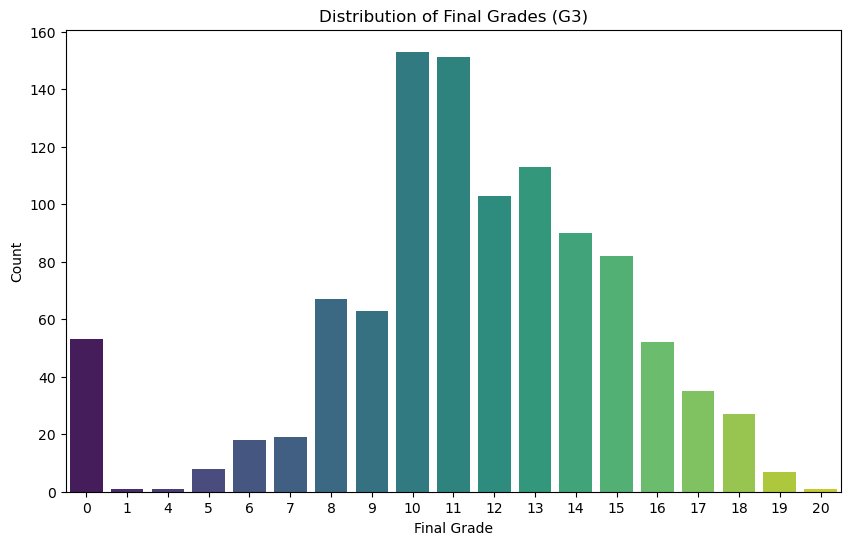

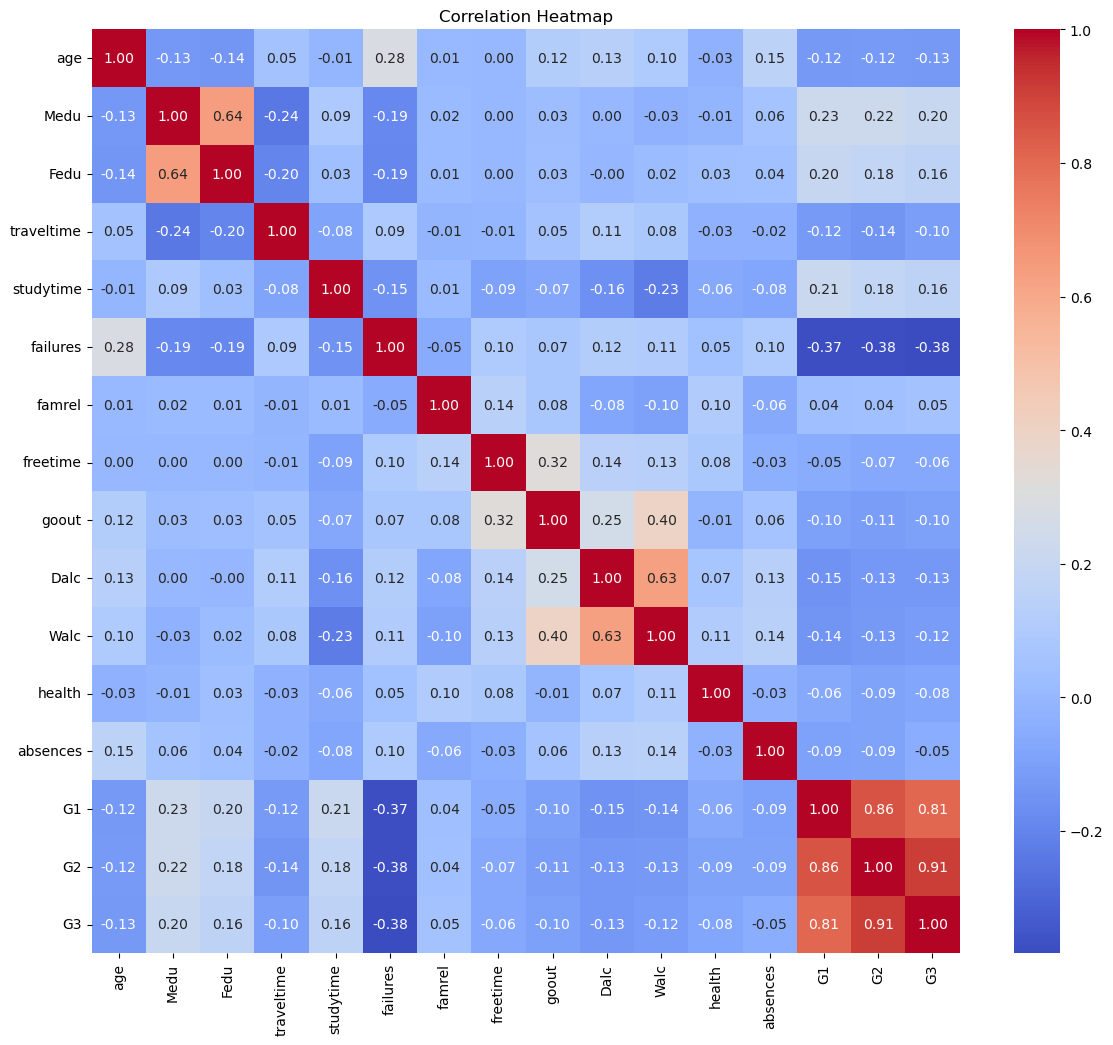

In [124]:
def exploratory_data_analysis(df):
    print(df.info())
    print(df.describe())
    
    # Visualize the distribution of final grades
    plt.figure(figsize=(10, 6))
    sns.countplot(x='G3', data=df, palette='viridis')
    plt.title('Distribution of Final Grades (G3)')
    plt.xlabel('Final Grade')
    plt.ylabel('Count')
    plt.show()
def exploratory_data_analysis(df):
    print(df.info())
    print(df.describe())
    
    # Visualize the distribution of final grades
    plt.figure(figsize=(10, 6))
    sns.countplot(x='G3', data=df, palette='viridis')
    plt.title('Distribution of Final Grades (G3)')
    plt.xlabel('Final Grade')
    plt.ylabel('Count')
    plt.show()
    
    # Correlation heatmap for numeric columns only
    numeric_df = df.select_dtypes(include=[np.number])
    plt.figure(figsize=(14, 12))
    sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

# Perform EDA
exploratory_data_analysis(students_df)

    


In [126]:
# Select features and target variable
X = students_df.drop(['G3'], axis=1)
y = students_df['G3']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), make_column_selector(dtype_include=np.number)),
        ('cat', OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=object))
    ]
)


In [130]:
# Initialize the models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
lgbm_model = LGBMRegressor(n_estimators=100, random_state=42)

# Create an ensemble using Voting Regressor
voting_regressor = VotingRegressor(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('lgbm', lgbm_model)
    ]
)

# Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', voting_regressor)
])


In [136]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning
param_grid = {
    'model__rf__n_estimators': [100, 200],
    'model__xgb__n_estimators': [100, 200],
    'model__lgbm__n_estimators': [100, 200]
}

# Ensure to import GridSearchCV
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 216
[LightGBM] [Info] Number of data points in the train set: 835, number of used features: 58
[LightGBM] [Info] Start training from score 11.413174
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001DD1AF87990>),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001DD1B10AD90>)])),
                                       ('model',
                                        Voti...
                                                                                  max_leaves=None,
                                                                                  min_child_weight=None,
                                                                                  missing=nan,
                                                                                  monotone_constraints=None,
                                                                                  multi_strategy=None,
                                                                                  n_estimators=100,
                                                                                  n_jobs=None,
                                                                                  num_parallel_tree=None,
                                                                                  random_state=42, ...)),
                                                                    ('lgbm',
                                                                     LGBMRegressor(random_state=42))]))]),
             n_jobs=-1,
             param_grid={'model__lgbm__n_estimators': [100, 200],
                         'model__rf__n_estimators': [100, 200],
                         'model__xgb__n_estimators': [100, 200]},
             scoring='r2')

Best Model Parameters: {'model__lgbm__n_estimators': 100, 'model__rf__n_estimators': 200, 'model__xgb__n_estimators': 200}
Mean Absolute Error: 0.9989777426075205
R^2 Score: 0.8080215006523023


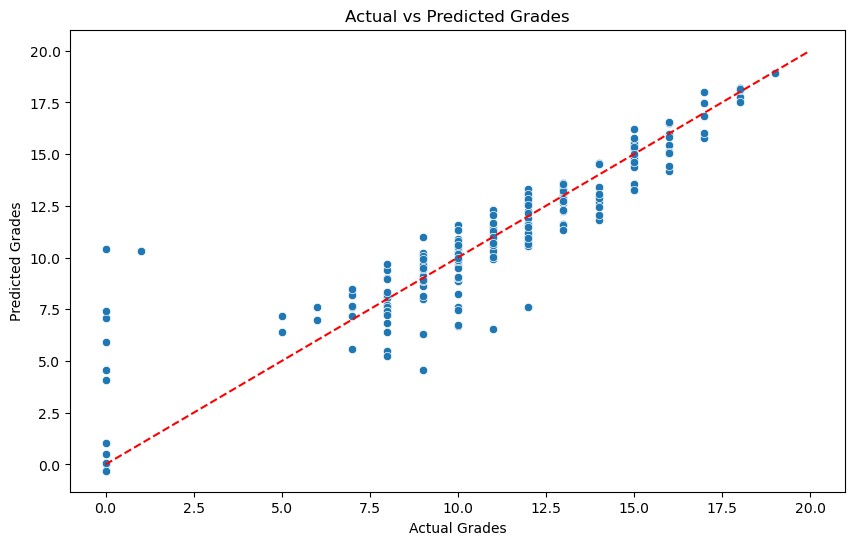

In [138]:
# Make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Best Model Parameters: {grid_search.best_params_}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, marker='o')
plt.plot([0, 20], [0, 20], 'r--')  # Add diagonal line for reference
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Actual vs Predicted Grades')
plt.show()
